# PREDICTIVE ANALYTICS OF COMPRESSIVE STRENGTH OF CONCRETE USING  REGRESSION MODEL

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>


- $ Compresive_ strengh: $ predictor or feature
- $\beta_0: $ slope coefficient
- $\beta_1, \beta_2, \beta_3: $ intercept terms


#  IMPORTING LIBRARIES

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy.stats import skew


In [150]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. DATA PREPROCESSING

### 1.1Load the Data

In [151]:
df = pd.read_csv('C:/Users/hornt/Desktop/PROJECT WORKS/Compressive strength of concrete/compresive_strength_concrete.csv')
print(df.shape)
print(df.columns)
df.head()

(1030, 9)
Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate ', 'Fine Aggregate ', 'Age ',
       'cpst'],
      dtype='object')


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,cpst
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


 Features:

- $ Cement: $ g of cement (component 1) in a m^3 mixture.
- $ Slag : $ kg of blast furnace slag (component 2) in a m^3 mixture.
- $flyash : $ kg of fly ash (component 3) in a m63 mixture
- $water: $ kg of water (component 4) in a m^3 mixture.
- $superplasticizer: $ kg of super plasticizer (component 5) in a m^3 mixture.
- $coarseaggregate: $  kg of coarse aggregate (component 6) in a m^3 mixture.
- $fineaggregate: $  kg of fine aggregate (component 7) in a m^3 mixture.
- $Age: $  Day (1~365)
- $cs MPa $  Concrete compressive strength in MPa

### 1.2Check for null Values 

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   Blast Furnace Slag   1030 non-null   float64
 2   Fly Ash              1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   Coarse Aggregate     1030 non-null   float64
 6   Fine Aggregate       1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   cpst                 1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


###  1.3Check for zero values 

In [153]:
(df == 0).sum()

Cement                   0
Blast Furnace Slag     471
Fly Ash                566
Water                    0
Superplasticizer       379
Coarse Aggregate         0
Fine Aggregate           0
Age                      0
cpst                     0
dtype: int64

# 2. EXPLORATORY DATA ANALYSIS

### 2.1 Box Plots 

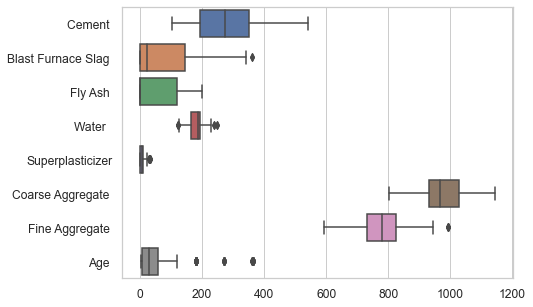

In [154]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,5)},font_scale= 1.1, style='whitegrid')
sns.boxplot(data=df.iloc[:,0:8], orient="h",dodge=False)
plt.savefig('Boxplotfeatures.png')

#ns.set()
#x.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [155]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate ', 'Fine Aggregate ', 'Age ',
       'cpst'],
      dtype='object')

In [156]:
df = df[(df['Blast Furnace Slag '] <= 340) & (df['Water  '] >= 130) &  (df['Water  '] <= 230)  &
    (df['Superplasticizer']<=24)  &  (df['Fine Aggregate ']<=930)  &   (df['Age ']<=60) ]
df.shape

(805, 9)

### 2.2 Plotting Histograms 

<Axes: ylabel='Frequency'>

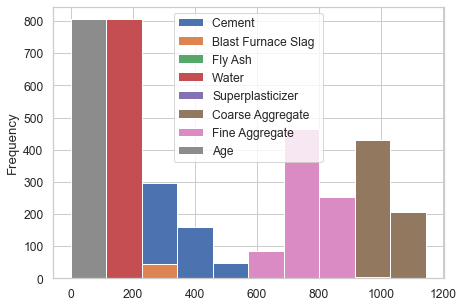

In [157]:
import matplotlib.pyplot as plt
df.iloc[:,0:8].plot.hist()

### 2.3 Box plots with histogram 

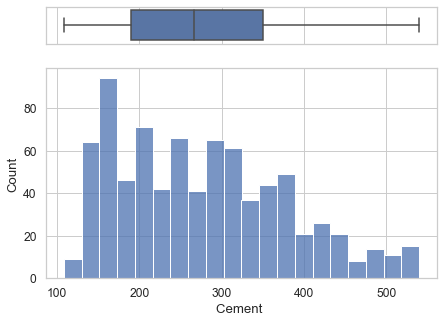

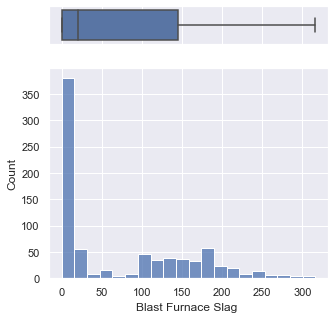

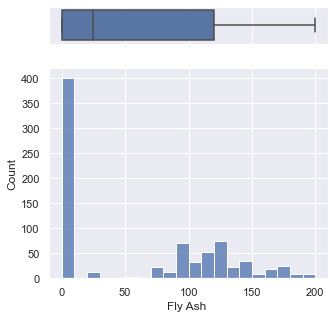

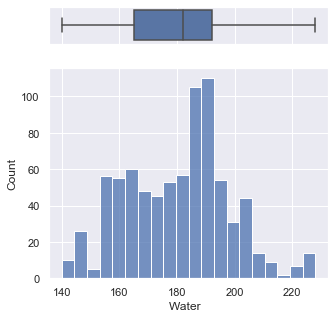

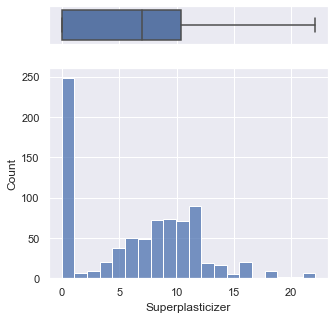

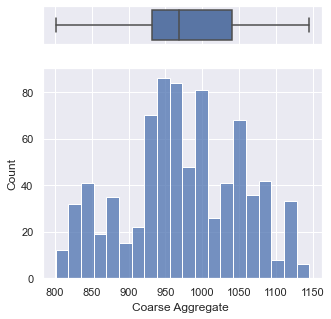

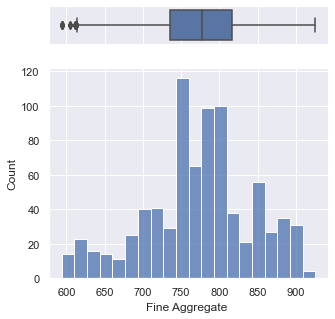

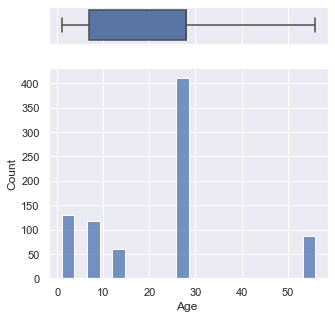

In [158]:
def hist_with_box(df ,x):
    fig , (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=df[x], ax=ax_box)
    sns.histplot(df[x], bins=20, kde=False, ax=ax_hist)
    sns.set(rc={'figure.figsize':(5,5)})
    ax_box.set(xlabel='')
    plt.savefig(x)
    plt.show()

for feature in df.iloc[:,0:8].columns:
    hist_with_box(df,feature)

###  2.4 Pair Plots

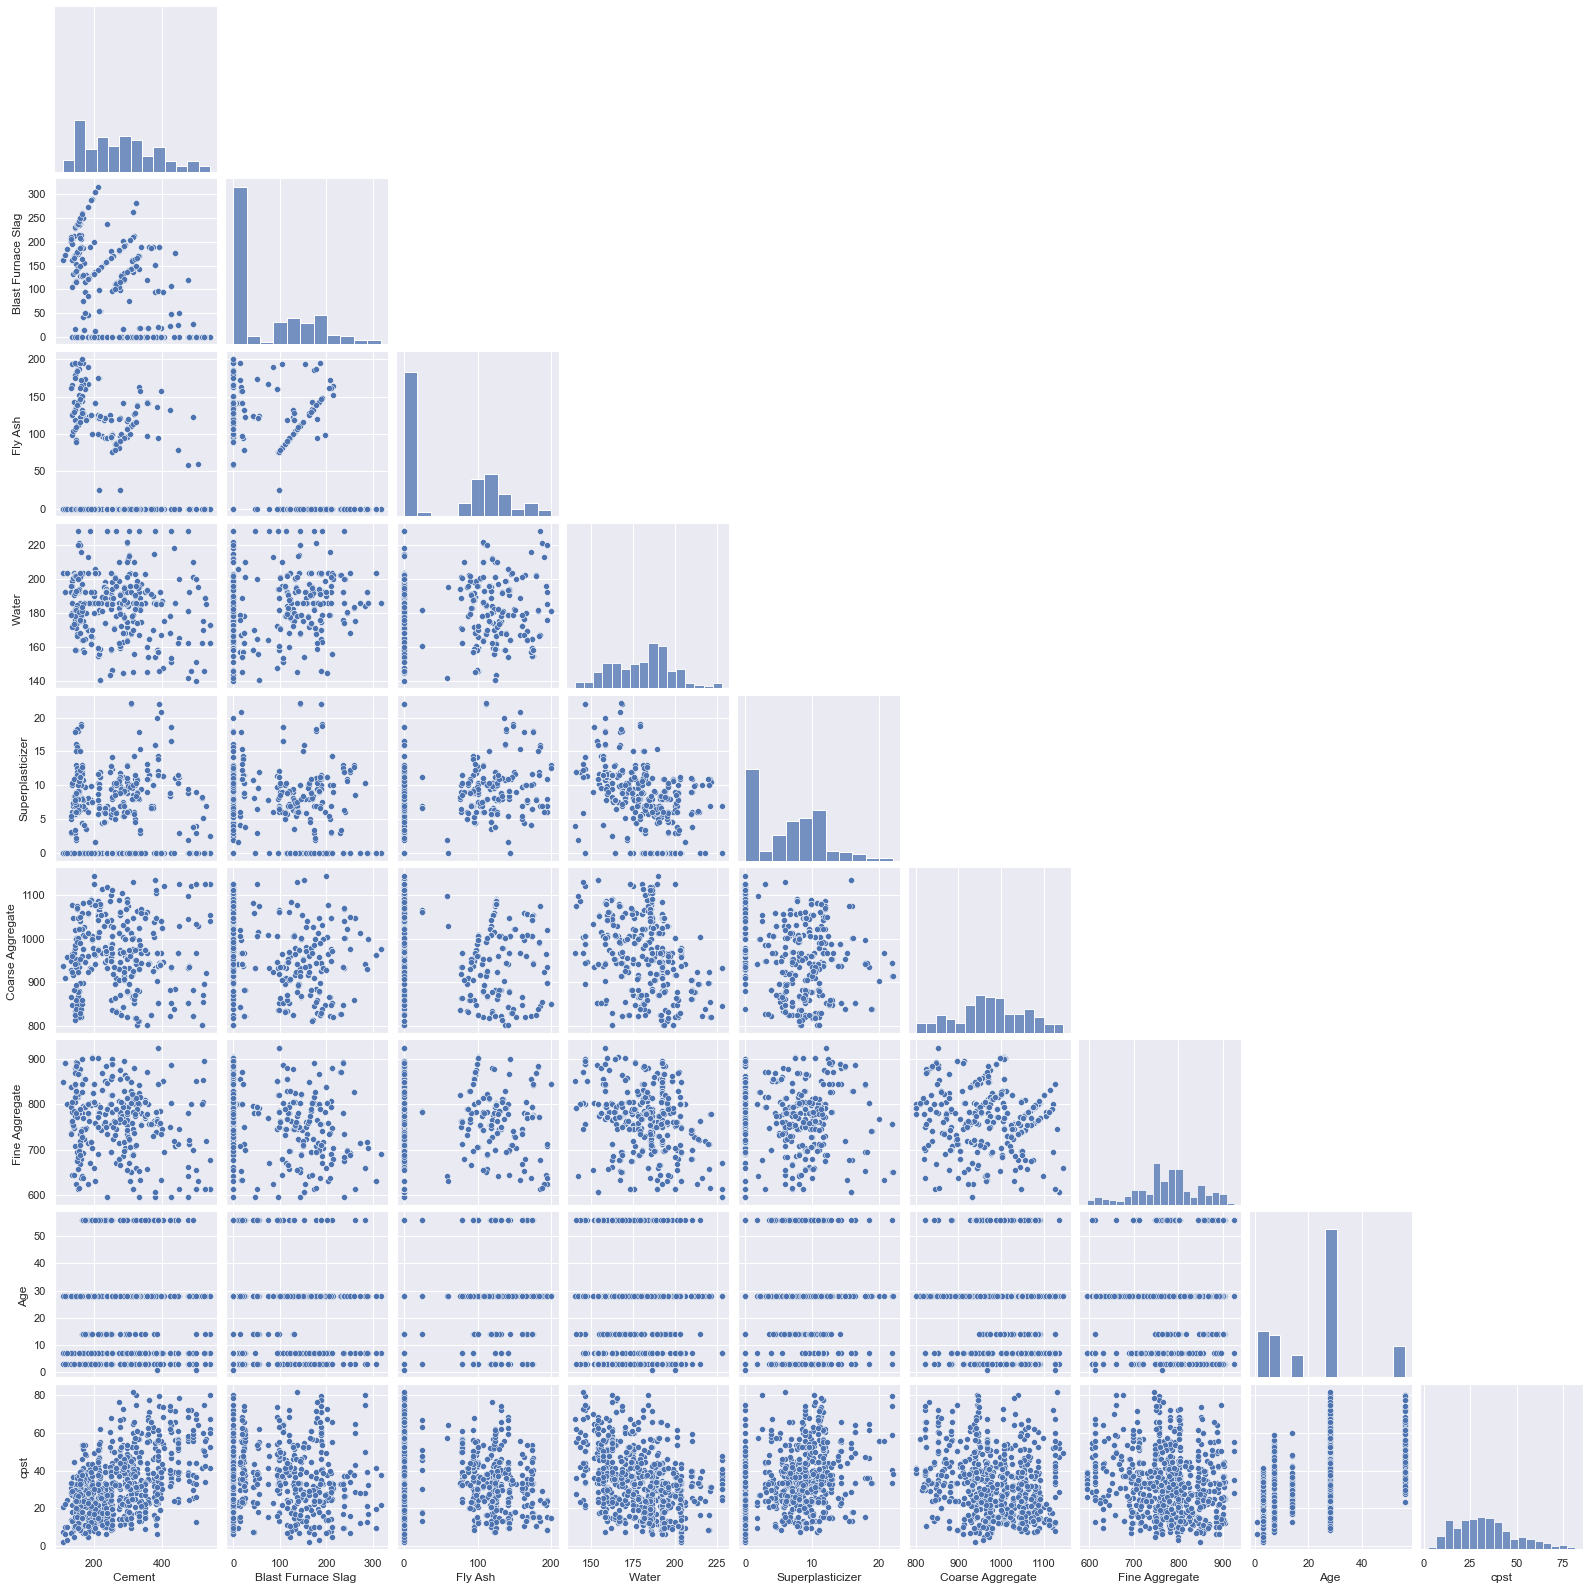

In [159]:
sns.pairplot(df,corner=True)
plt.savefig('pairplot.png')

### 2.5 Heat Map

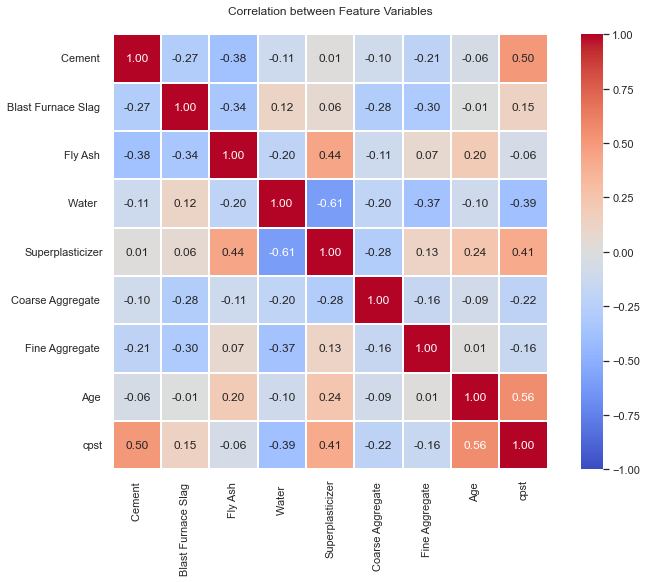

In [160]:
plt.figure(figsize=(12, 8))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1,  
    center=0,
    cmap ='coolwarm',
    annot=True,
    square=True,
    fmt='.2f',
    linewidth =0.1
)
plt.title('Correlation between Feature Variables',pad =20)
plt.savefig('corrmap')
plt.show()

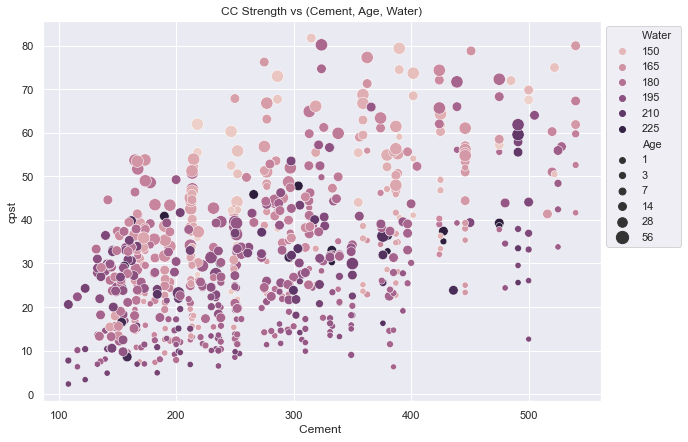

In [161]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="cpst", x="Cement ", hue="Water  ", size="Age ", data=df, ax=ax, sizes=(35, 150))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.savefig('CC Strength vs (Cement, Age, Water)')
plt.show()

# MODEL BUILDING

### Importing Libraries 

In [162]:
# Model Selection Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import cross_val_score,GridSearchCV


# Feature Selection Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA


#model building functions
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#Evaluation Metrics -Report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, roc_curve


### Pre-processing

In [163]:
# Defining Variables 
X = df.iloc[:,:-1]         # Features - All columns but last
y = df.iloc[:,-1]          # Target - Last Column

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(539, 8) (266, 8) (539,) (266,)


### Feature Selection 

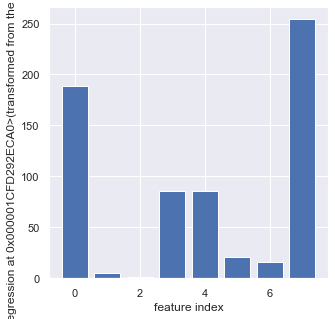

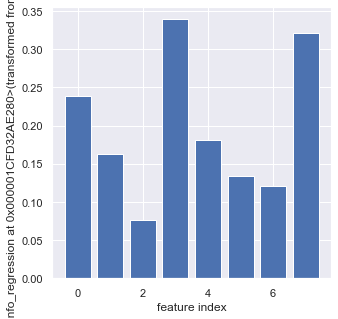

In [165]:
def feature_selection(method):
    # feature selection
    f_selector = SelectKBest(score_func=method, k='all')
    # learn relationship from training data
    f_selector.fit(X_train, y_train)
    # transform train input data
    X_train_fs = f_selector.transform(X_train)
    # transform test input data
    X_test_fs = f_selector.transform(X_test)
    # Plot the scores for the features
    plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
    plt.xlabel("feature index")
    plt.ylabel( str(method) +  "(transformed from the correlation values)")
    plt.show()

feature_selection(f_regression)
feature_selection(mutual_info_regression)

In [166]:
pca = PCA(n_components=6)
pca.fit(X)
X_pca = pca.transform(X)

##  Model Building 

### Model Selection using Cross Validation Scores

In [168]:
scorings =['r2','neg_root_mean_squared_error','neg_mean_absolute_error']
#define a dataframe 
CrossVal_Test =pd.DataFrame( columns=['Model','r2','MSE(-ve)','MAE(-ve)'])

def score_models(model_name, model,i):   
    score_lst =[]
    score_lst.append(model_name)
    for j in range(len(scorings)):
        score = cross_val_score(model, X_train, y_train, cv=8, scoring= scorings[j])
        #     print("{} average: {}".format(model_name, score.mean()))
        score_lst.append(score.mean())
    CrossVal_Test.loc[i] =score_lst

In [169]:
models = {"Linear Regression": LinearRegression(),
    "Lasso Regression" : Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "KNeighborsRegressor" :KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}


for i in range(len([*models])):
    score_models([*models][i],models[[*models][i]],i)

CrossVal_Test.head(10)   

,Model,r2,MSE(-ve),MAE(-ve)
0,Linear Regression,0.781498,-7.474751,-5.580907
1,Lasso Regression,0.489955,-11.504822,-9.140494
2,Ridge Regression,0.779473,-7.517389,-5.632580
3,Random Forest,0.852025,-6.106548,-4.272012
4,DecisionTreeRegressor,0.727744,-8.133559,-5.306685
5,GradientBoostingRegressor,0.866066,-5.819938,-4.311330
6,KNeighborsRegressor,0.760866,-7.852329,-5.811076
7,XGBoost,0.883505,-5.432785,-3.679315


### Defining ML training function

In [170]:
error = []
intercept=[]
coeff =[]

def train(models):

    for i in list(models.keys()):
        error_lst =[]
        x = models[i]
        x.fit(X_train, y_train)
        y_pred_x = x.predict(X_test)
        print(y_pred_x.shape)
        #error estimate
        error_lst.extend([i,np.sqrt(mean_squared_error(y_test, y_pred_x)),
                    mean_squared_error(y_test, y_pred_x),mean_absolute_error(y_test, y_pred_x), 
                    r2_score(y_test, y_pred_x)])
        error.append(error_lst)
        
   
        #plotting graph
        plt.scatter(y_test, y_pred_x)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(x)
        plt.savefig(str(x))
        plt.show()       

### Calling training function 

(266,)


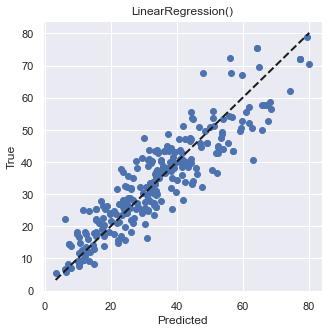

(266,)


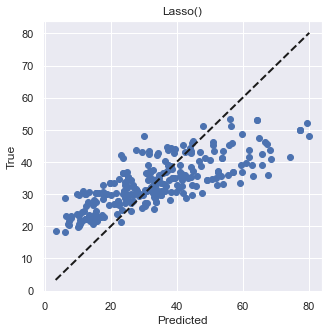

(266,)


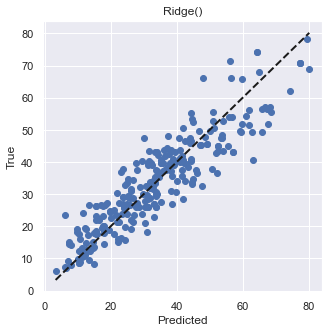

(266,)


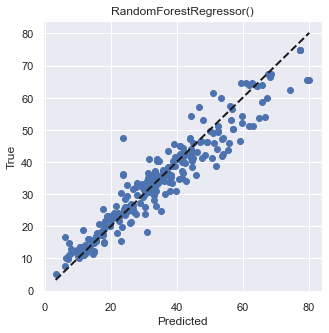

(266,)


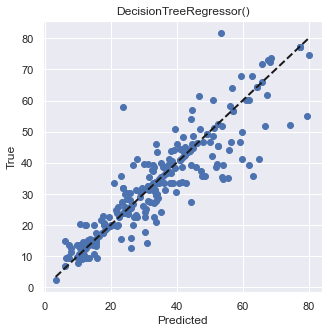

(266,)


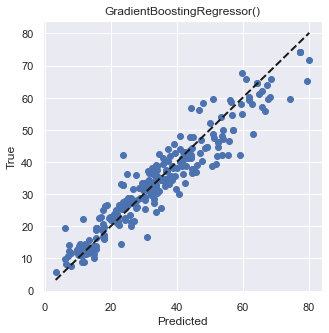

(266,)


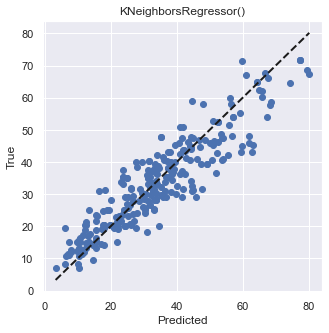

(266,)


ValueError: Format ')' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

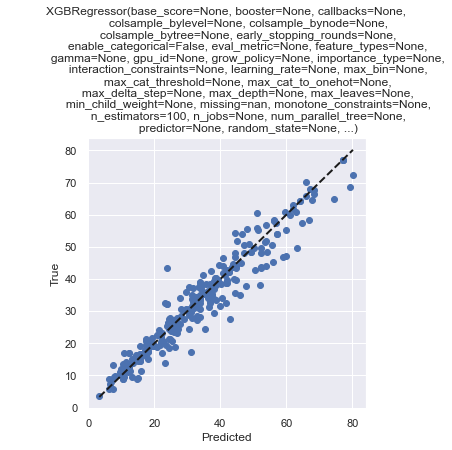

In [171]:
#List of the models to be build as a dictionary

models = {"Linear Regression": LinearRegression(),
    "Lasso Regression" : Lasso(),
    "Ridge Regression": Ridge(),    
    "Random Forest": RandomForestRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "KNeighborsRegressor" :KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
}

train(models)


### Error Estimation 

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

                       Model       RMSE         MSE       MAE        R2
0          Linear Regression   6.937299   48.126116  5.430162  0.824141
1           Lasso Regression  11.742998  137.897992  9.347984  0.496104
2           Ridge Regression   6.963428   48.489323  5.467101  0.822814
3              Random Forest   4.979418   24.794601  3.490193  0.909398
4      DecisionTreeRegressor   7.254907   52.633670  4.538797  0.807670
5  GradientBoostingRegressor   5.202251   27.063413  3.933820  0.901107
6        KNeighborsRegressor   6.752062   45.590337  5.260827  0.833407
7                    XGBoost   4.473445   20.011707  3.046677  0.926875


Text(0.5, 1.0, 'Model accuracy comparison')

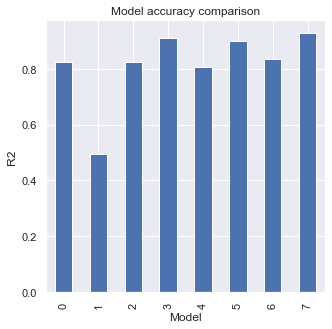

In [172]:
error
error_df = pd.DataFrame(error,columns =['Model','RMSE','MSE','MAE','R2'])
print(error_df)
error_df['R2'].plot.bar()

plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Model accuracy comparison')

### Hyper Parameter Tuning 

Selecting 3 top performing models for hyper parameter tuning
-  XGBoost Regressor  
- Random Forest Regressor
- Gradient boosting Regreesor

####  Random Forest Regressor

In [173]:
tuned_score=[]
params = { 
          'n_estimators': [1000],
          'max_depth': [6,7,8],                  #'max_depth': [4,5,6,7,8,9]
          'max_features': ['auto', 'sqrt'],  #'max_features': ['auto', 'sqrt']
          'min_samples_leaf': [4],           #'min_samples_leaf': [2,3,4,5,6,7]
          'min_samples_split' : [0.001],      #'min_samples_split' : [0.01]
         }

rf = RandomForestRegressor()
rs = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

C:\Users\hornt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=0.001, n_estimators=1000)


In [174]:
model_rfr =  rs.best_estimator_
model_rfr.fit(X_train, y_train)
y_pred_model_rfr = model_rfr.predict(X_test)
tuned_score.append([rf,r2_score(y_test, y_pred_model_rfr)])

C:\Users\hornt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [175]:
tuned_score

[[RandomForestRegressor(), 0.8777899503237775]]

#### XGB regressor

In [176]:
params ={ 'learning_rate' : [0.1],
          'n_estimators' :[400], 'max_depth' : [3],}

rf = XGBRegressor()
rs = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)

model_xgb =  rs.best_estimator_
model_xgb.fit(X_train, y_train)
y_pred_model_xgb = model_xgb.predict(X_test)
tuned_score.append(["XGBRegressor",r2_score(y_test, y_pred_model_xgb)])

#### Gradient Boosting Regressor 

In [177]:
params = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [150, 200],
    'max_depth' : [3, 4, 5]
}

rf = GradientBoostingRegressor()
rs = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)

model_gbr =  rs.best_estimator_
model_gbr.fit(X_train, y_train)
y_pred_model_gbr = model_gbr.predict(X_test)
tuned_score.append(["GradientBoostingRegressor",r2_score(y_test, y_pred_model_gbr)])

In [178]:
tuned_score

[[RandomForestRegressor(), 0.8777899503237775],
 ['XGBRegressor', 0.924395397288091],
 ['XGBRegressor', 0.9136534837196183]]

In [179]:
tuned_score_df =pd.DataFrame(tuned_score,columns=['Models','R2'])
tuned_score_df

,Models,R2
0,RandomForestRegressor(),0.877790
1,XGBRegressor,0.924395
2,XGBRegressor,0.913653


### Plotting  